In [1]:

import numpy as np
import pandas as pd
# importing ploting libraries
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("/content/drive/MyDrive/0.Latest_DS_Course/USL/HierarchialClustering/Notebooks/car-mpg.csv")

In [4]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [5]:
mpg_df = mpg_df.replace('?', np.nan)
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [6]:
numeric_cols = mpg_df.drop('car_name', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
car_names = pd.DataFrame(mpg_df[['car_name']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
mpg_df = numeric_cols.join(car_names)   # Recreating mpg_df by combining numerical columns with car names

mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


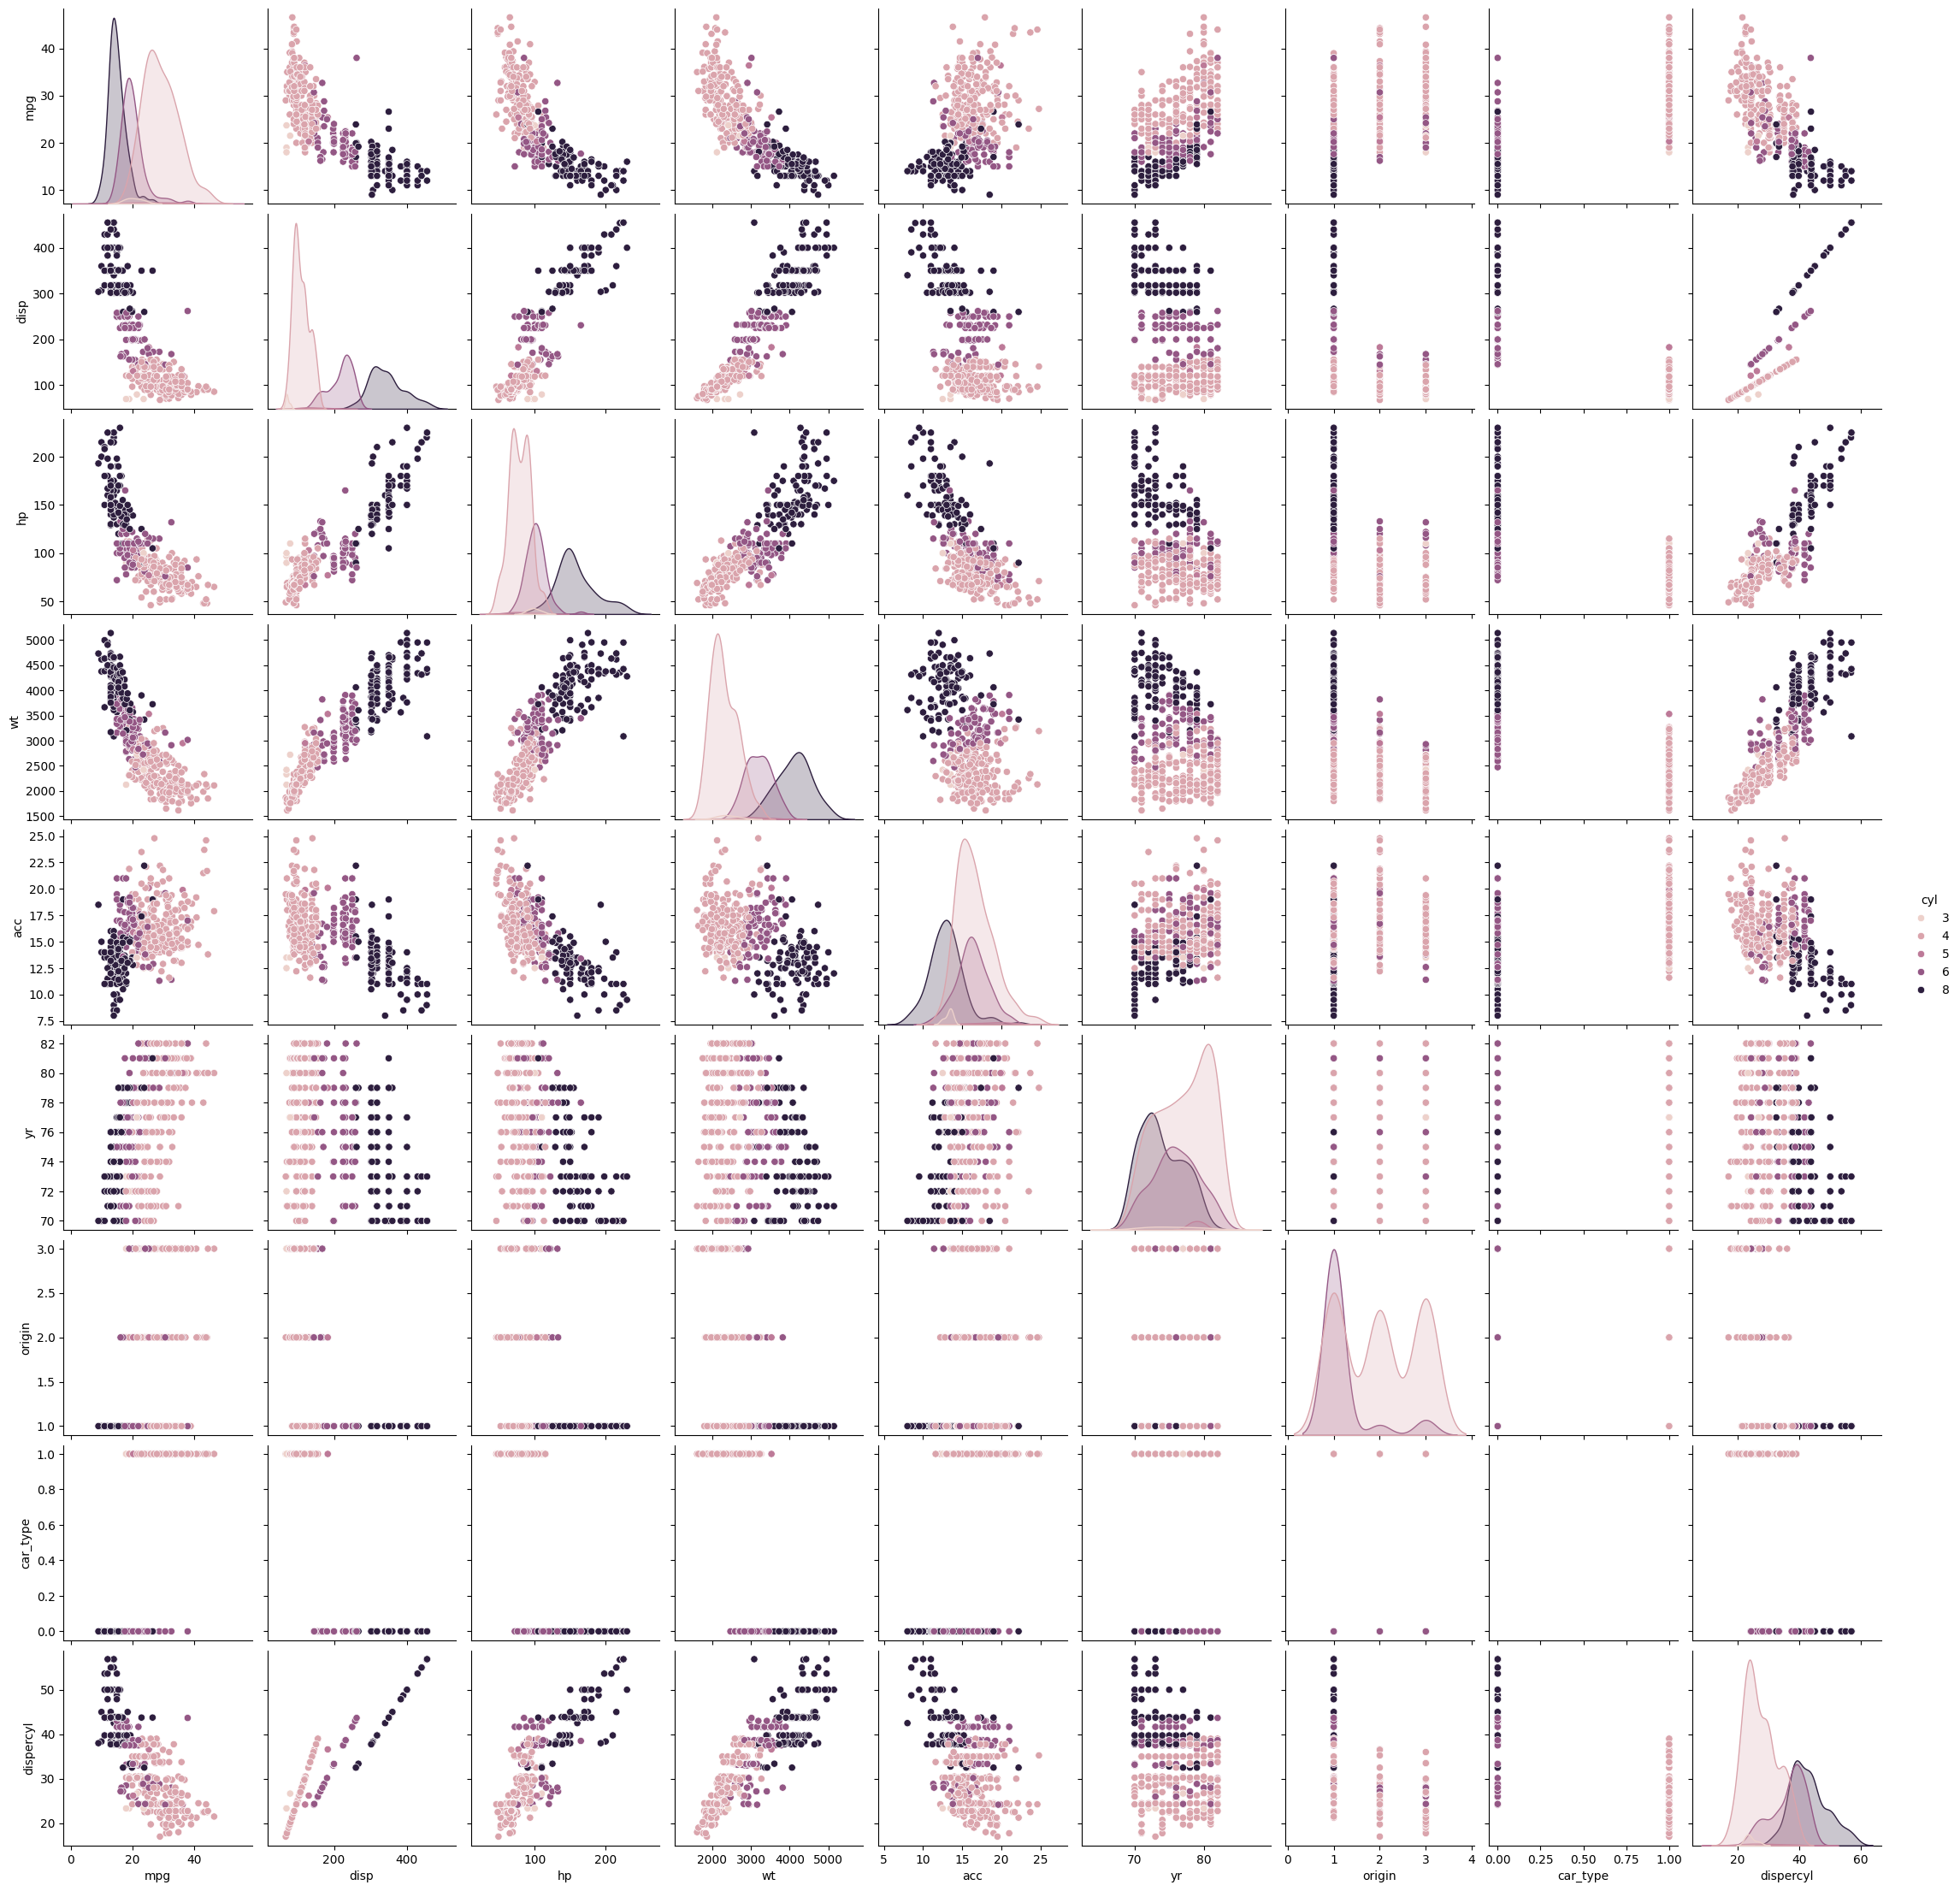

In [7]:

mpg_df_attr = mpg_df.iloc[:, 0:9]
mpg_df_attr['dispercyl'] = mpg_df_attr['disp'] / mpg_df_attr['cyl']
sns.pairplot(mpg_df_attr, diag_kind='kde', hue = 'cyl')   # to plot density curve instead of histogram


In [8]:
from scipy.stats import zscore

mpg_df_attr = mpg_df.loc[:, 'mpg':'origin']
mpg_df_attr_z = mpg_df_attr.apply(zscore)


mpg_df_attr_z.pop('origin')      # Remove "origin" and "yr" columns
mpg_df_attr_z.pop('yr')

array = mpg_df_attr_z.values


In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
model = AgglomerativeClustering(n_clusters=6, metric='euclidean',  linkage='complete')

In [11]:
model.fit(array)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [12]:
mpg_df_attr['labels'] = model.labels_

mpg_df_attr.groupby(["labels"]).count()

,mpg,cyl,disp,hp,wt,acc,yr,origin
labels,,,,,,,,
0,40,40,40,40,40,40,40,40
1,160,160,160,160,160,160,160,160
2,38,38,38,38,38,38,38,38
3,15,15,15,15,15,15,15,15
4,85,85,85,85,85,85,85,85
5,60,60,60,60,60,60,60,60


In [13]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [14]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [15]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(mpg_df_attr, 'average')
c, coph_dists = cophenet(Z , pdist(mpg_df_attr))

c

np.float64(0.7782846285817825)

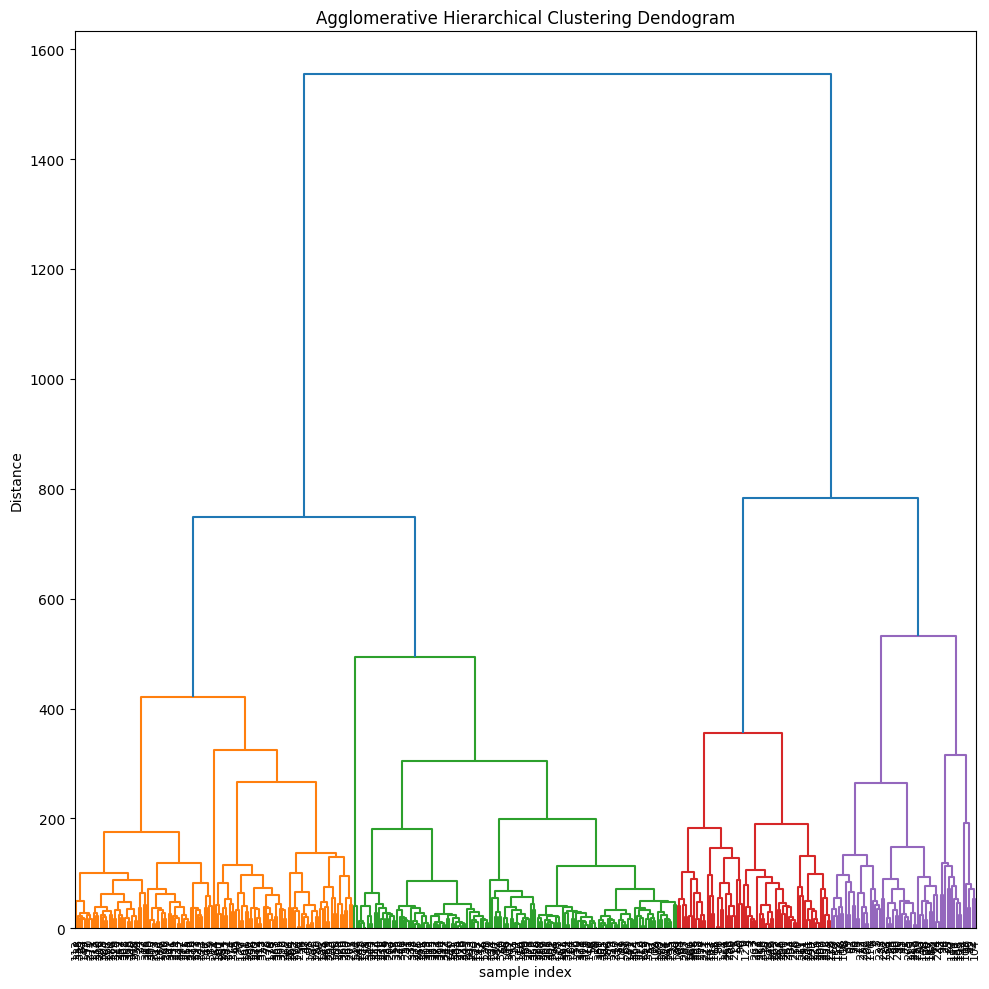

In [16]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 650, leaf_font_size=8. )
plt.tight_layout()

## **Cophenet Coefficient**

---

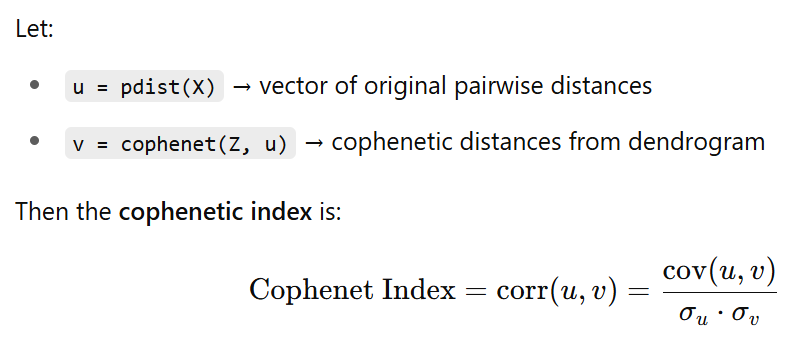

In [17]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(mpg_df_attr, 'complete' )
c, coph_dists = cophenet(Z , pdist(mpg_df_attr))

c

np.float64(0.7834776832930737)

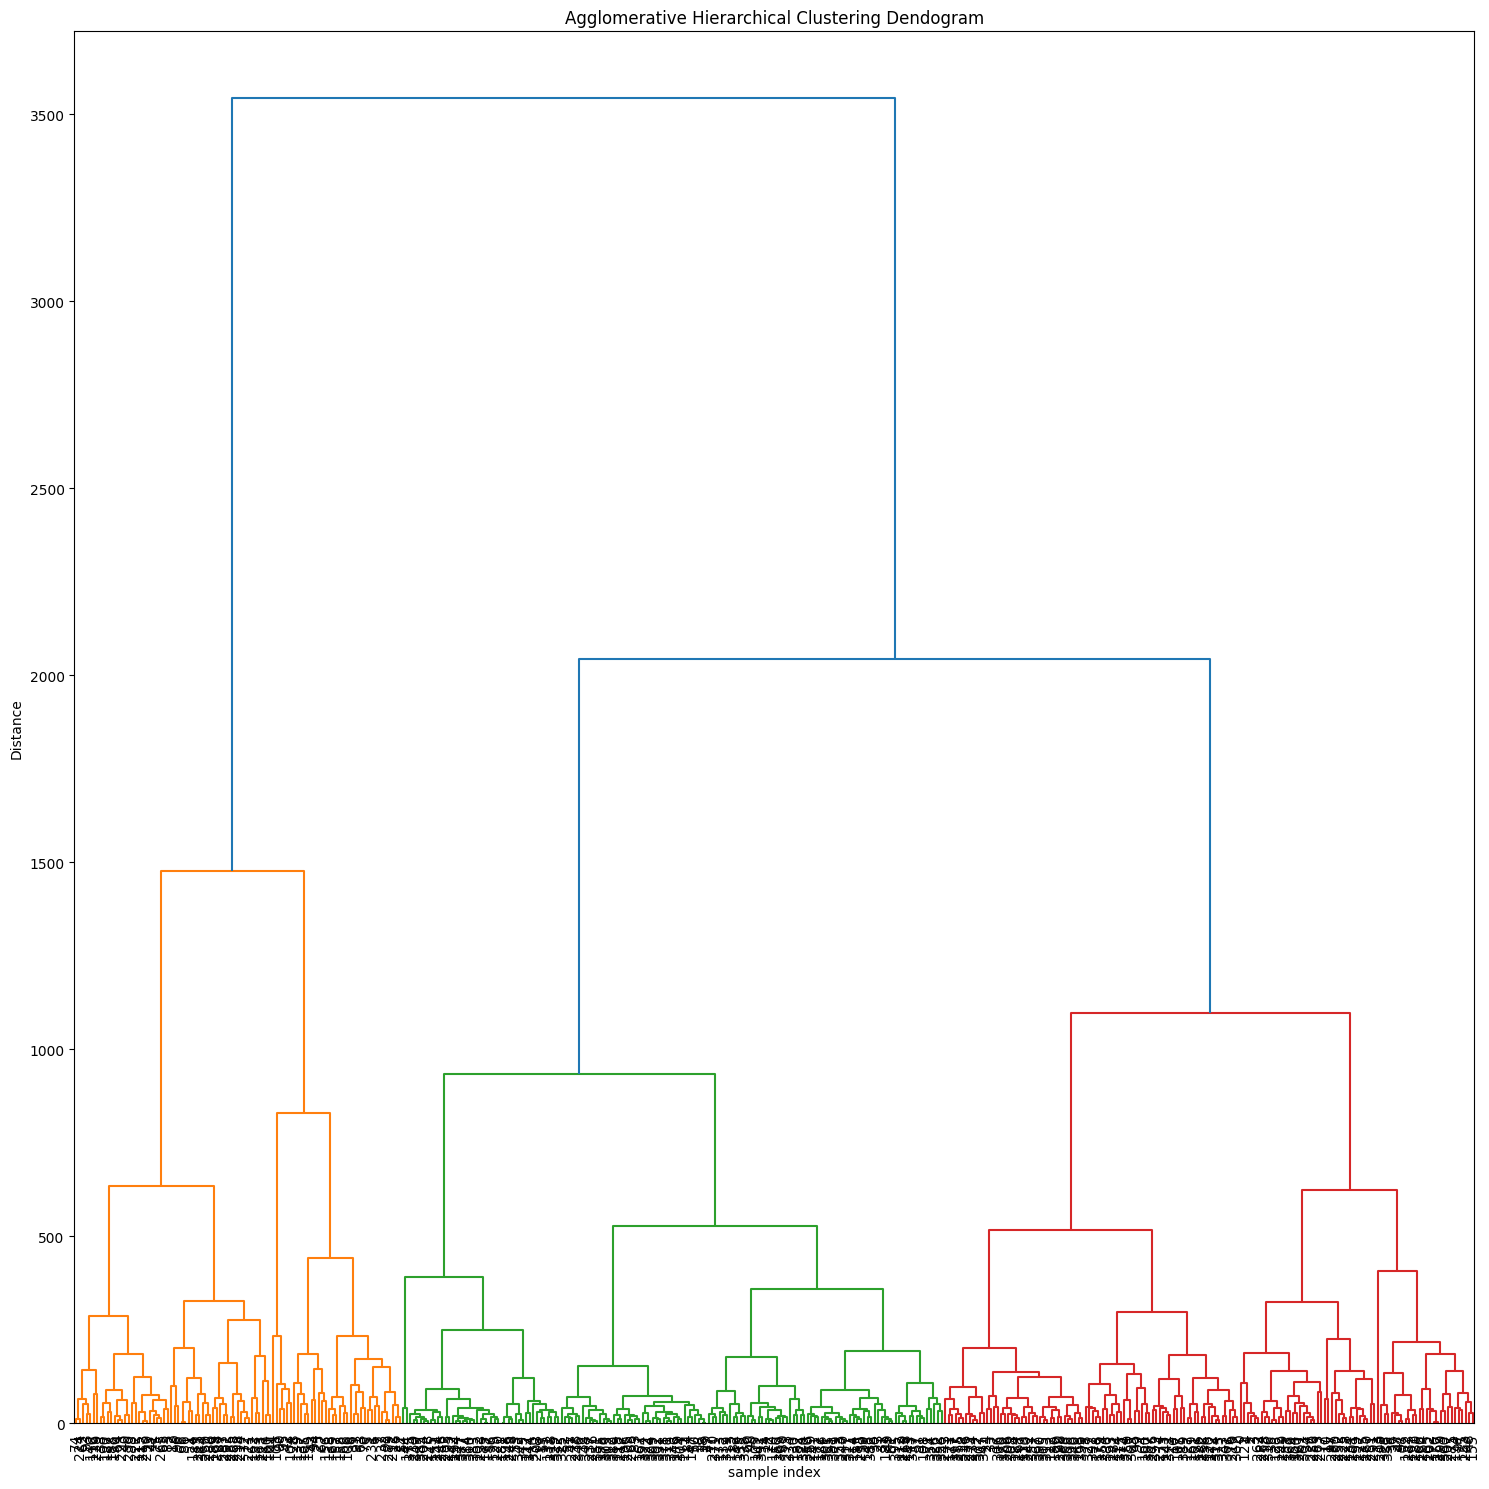

In [18]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=1600,  leaf_font_size=10. )
plt.tight_layout()

In [19]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(mpg_df_attr, 'ward')
c, coph_dists = cophenet(Z , pdist(mpg_df_attr))

c

np.float64(0.7736648970853218)

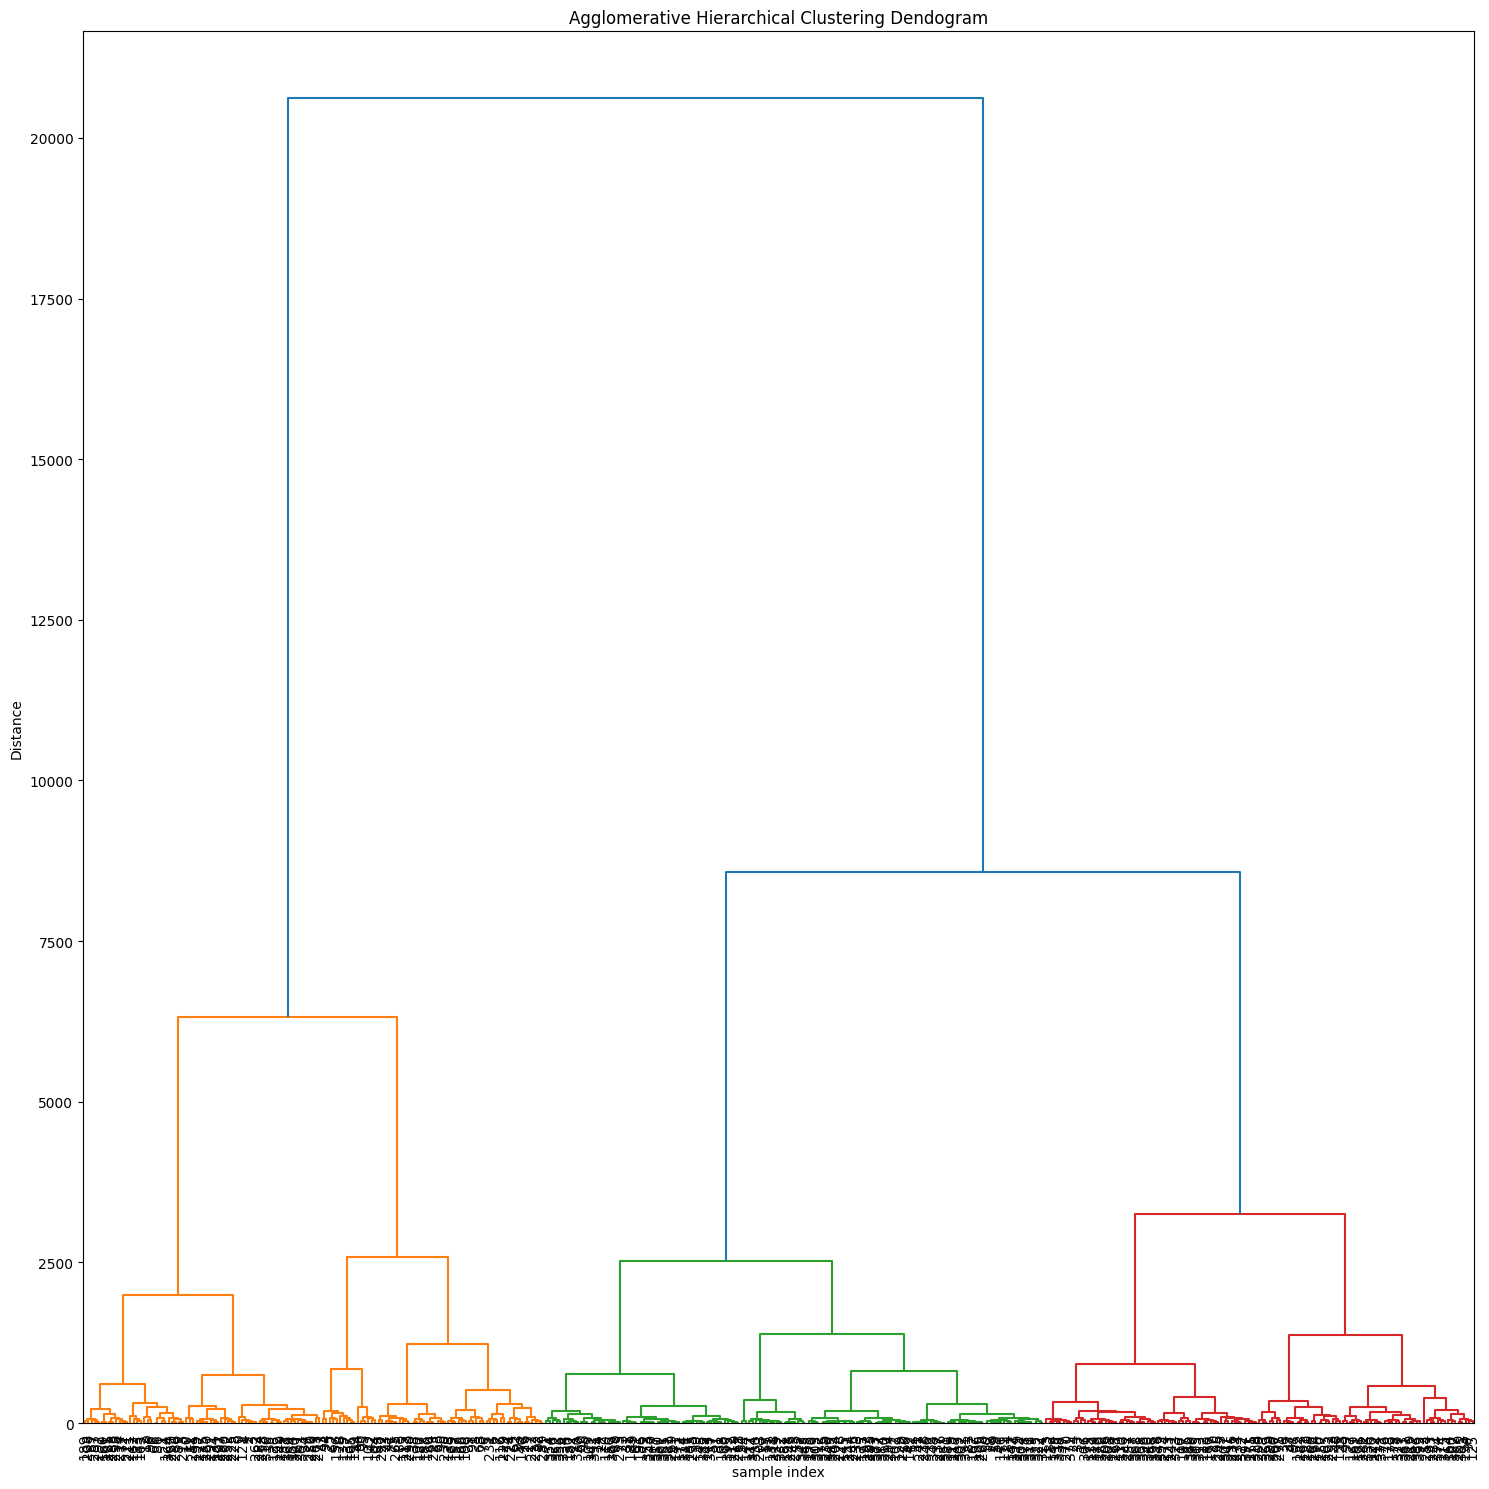

In [20]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=7500,  leaf_font_size=10. )
plt.tight_layout()

In [21]:
model = AgglomerativeClustering(n_clusters=3, metric='l2',  linkage='complete')

In [22]:
model.fit(array)

AgglomerativeClustering(linkage='complete', metric='l2', n_clusters=3)

In [23]:
mpg_df_attr['labels'] = model.labels_

mpg_df_attr.groupby(["labels"]).count()

,mpg,cyl,disp,hp,wt,acc,yr,origin
labels,,,,,,,,
0,260,260,260,260,260,260,260,260
1,100,100,100,100,100,100,100,100
2,38,38,38,38,38,38,38,38


In [24]:
mpg_df_attr.groupby("labels").size()

,0
labels,
0,260
1,100
2,38


## **More on Cophenet Coefficient**

---

##  What is the Cophenetic Correlation Coefficient?

The **Cophenetic Correlation Coefficient (Cophenet Index)** is a measure of how well a dendrogram (from hierarchical clustering) **preserves the original pairwise distances** between data points.

---

### How it Works:

- It compares:
  1. **Actual distances** between all pairs of points (`pdist`)
  2. **Cophenetic distances** = the **heights** at which those point-pairs merge in the dendrogram
- It computes the **Pearson correlation** between these two sets of distances.
- If the **relative structure** of distances is preserved well in the dendrogram, the index will be **close to 1**.

---

###  Interpretation:

| Cophenet Index | Interpretation                                  |
|----------------|--------------------------------------------------|
| Near `1.0`     | Dendrogram closely reflects actual distances     |
| Around `0.5`   | Moderate distortion in clustering representation |
| Near `0.0`     | Dendrogram poorly represents true distances      |

---

###  Why Might the Cophenet Index Be Low?

> Even though all clustering is *based on distances*, the **way** clusters are merged affects how well those distances are preserved.

#### Causes of Mismatch:
- **Linkage method bias**:
  - `single` linkage may form **long chains** → underrepresents true distances
  - `complete` linkage may **overestimate** distances to avoid distant merges
  - `average` and `ward` try to balance things but may still distort structure
- **Strategy of merging** can cause:
  - Two **very close points** to be merged **late**
  - Two **moderately far points** to be merged **early**

This breaks the original **rank-order of distances**, leading to **lower correlation** and thus a **lower cophenetic index**.

---
